In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

df=pd.read_csv("data.csv")
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


## data preprocesing

In [95]:
#some Feautre Engineering

df["company"]=df["Name"].apply(lambda x :x.split()[0])
#df["Price"]=df["Price"]*100000


In [96]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,company
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti


In [97]:
# convert text to numberical
df['Engine (cc)'] = df['Engine'].str.replace('CC', '')
df['Mileage'] = df['Mileage'].str.replace("km/kg", '')
df['Mileage (km/kg)'] = df['Mileage'].str.replace("kmpl", '')
df['Power (bhp)'] = df['Power'].str.replace('bhp', '')
# cleaing data
for col in ["Mileage (km/kg)","Power (bhp)","Engine (cc)"]:
    df[col]=pd.to_numeric(df[col],errors='coerce')


In [98]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,company,Engine (cc),Mileage (km/kg),Power (bhp)
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,998.0,26.60,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,1582.0,19.67,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,1199.0,18.20,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,1248.0,20.77,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,1968.0,15.20,140.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti,1248.0,28.40,74.00
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai,1120.0,24.40,71.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra,2498.0,14.00,112.00
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti,998.0,18.90,67.10


In [99]:
df=df.drop(["New_Price","Unnamed: 0","Name","Mileage","Engine","Power"],axis=1)


In [100]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,company,Engine (cc),Mileage (km/kg),Power (bhp)
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,998.0,26.60,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,1582.0,19.67,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,1199.0,18.20,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,1248.0,20.77,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,1968.0,15.20,140.80
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,1248.0,28.40,74.00
6015,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,1120.0,24.40,71.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,2498.0,14.00,112.00
6017,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,998.0,18.90,67.10


In [101]:
for col in ["Location","Fuel_Type","Transmission","Owner_Type","company"]:
    print(f"{col}")
    print(df[col].unique())
    print("______________")

Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
______________
Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
______________
Transmission
['Manual' 'Automatic']
______________
Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
______________
company
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
______________


In [102]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,company,Engine (cc),Mileage (km/kg),Power (bhp)
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,998.0,26.60,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,1582.0,19.67,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,1199.0,18.20,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,1248.0,20.77,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,1968.0,15.20,140.80
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,1248.0,28.40,74.00
6015,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,1120.0,24.40,71.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,2498.0,14.00,112.00
6017,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,998.0,18.90,67.10


In [103]:
df.describe()

,Year,Kilometers_Driven,Seats,Price,Engine (cc),Mileage (km/kg),Power (bhp)
count,6019.000000,6.019000e+03,5977.000000,6019.000000,5983.000000,6017.000000,5876.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468,1621.276450,18.134961,113.253050
std,3.269742,9.126884e+04,0.808840,11.187917,601.355233,4.582289,53.874957
min,1998.000000,1.710000e+02,0.000000,0.440000,72.000000,0.000000,34.200000
25%,2011.000000,3.400000e+04,5.000000,3.500000,1198.000000,15.170000,75.000000
50%,2014.000000,5.300000e+04,5.000000,5.640000,1493.000000,18.150000,97.700000
75%,2016.000000,7.300000e+04,5.000000,9.950000,1984.000000,21.100000,138.100000
max,2019.000000,6.500000e+06,10.000000,160.000000,5998.000000,33.540000,560.000000


In [104]:
#to get rid of zero of seats

median_of_Seats = df['Seats'].median()

df['Seats'] = df['Seats'].apply(lambda x: median_of_Seats if x == 0.0 else x)

#to get rid of zero of Mileage

median_of_Mileage = df['Mileage (km/kg)'].median()

df['Mileage (km/kg)'] = df['Mileage (km/kg)'].apply(lambda x:median_of_Mileage if x == 0.0 else x)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Seats              5977 non-null   float64
 7   Price              6019 non-null   float64
 8   company            6019 non-null   object 
 9   Engine (cc)        5983 non-null   float64
 10  Mileage (km/kg)    6017 non-null   float64
 11  Power (bhp)        5876 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [106]:
df.isna().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Seats                 42
Price                  0
company                0
Engine (cc)           36
Mileage (km/kg)        2
Power (bhp)          143
dtype: int64

In [107]:
#work with missing data

df["Power (bhp)"].fillna(df['Power (bhp)'].mean(), inplace=True)

df["Mileage (km/kg)"].fillna(df['Mileage (km/kg)'].mean(), inplace=True)
df["Engine (cc)"].fillna(df['Engine (cc)'].mean(), inplace=True)

df["Seats"].fillna(df['Seats'].mean(), inplace=True)

In [108]:
df.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
company              0
Engine (cc)          0
Mileage (km/kg)      0
Power (bhp)          0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Seats              6019 non-null   float64
 7   Price              6019 non-null   float64
 8   company            6019 non-null   object 
 9   Engine (cc)        6019 non-null   float64
 10  Mileage (km/kg)    6019 non-null   float64
 11  Power (bhp)        6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [110]:
df.describe()

,Year,Kilometers_Driven,Seats,Price,Engine (cc),Mileage (km/kg),Power (bhp)
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.00000,6019.000000
mean,2013.358199,5.873838e+04,5.279572,9.479468,1621.276450,18.34008,113.253050
std,3.269742,9.126884e+04,0.803142,11.187917,599.553865,4.15117,53.231019
min,1998.000000,1.710000e+02,2.000000,0.440000,72.000000,6.40000,34.200000
25%,2011.000000,3.400000e+04,5.000000,3.500000,1198.000000,15.40000,78.000000
50%,2014.000000,5.300000e+04,5.000000,5.640000,1493.000000,18.16000,98.600000
75%,2016.000000,7.300000e+04,5.000000,9.950000,1969.000000,21.10000,138.030000
max,2019.000000,6.500000e+06,10.000000,160.000000,5998.000000,33.54000,560.000000


### Data Analauis

In [111]:
df.groupby("company").describe()["Price"].transpose()

company,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
count,1.00,236.000000,267.000000,1.0,121.000000,13.000000,28.000000,3.000000,300.000000,608.000000,...,27.000000,91.000000,18.000000,145.000000,173.000000,1.0,186.000000,411.000000,315.000000,21.000000
mean,1.35,25.537712,25.243146,59.0,3.044463,3.049231,3.269286,9.333333,6.889400,5.411743,...,11.058889,4.738352,48.348333,5.799034,7.559075,3.0,3.562849,11.580024,5.307270,18.802857
std,NaN,12.344783,15.164924,NaN,1.827563,0.476156,1.901356,2.309401,7.508742,2.541032,...,7.138884,1.759250,19.632666,2.384815,5.036701,NaN,2.693689,7.001564,2.460562,5.854036
min,1.35,7.500000,6.300000,59.0,0.750000,2.250000,0.550000,8.000000,0.690000,0.900000,...,1.000000,1.750000,2.020000,2.400000,1.250000,3.0,0.440000,1.500000,2.100000,7.250000
25%,1.35,17.500000,13.925000,59.0,1.750000,2.700000,2.087500,8.000000,2.750000,3.540000,...,5.865000,3.275000,40.727500,3.800000,4.250000,3.0,1.695000,5.550000,3.750000,16.000000
50%,1.35,23.500000,21.000000,59.0,2.500000,3.100000,2.600000,8.000000,5.345000,4.950000,...,9.950000,4.300000,47.020000,5.490000,6.000000,3.0,2.900000,10.750000,4.890000,18.250000
75%,1.35,31.947500,32.160000,59.0,3.700000,3.310000,4.700000,10.000000,7.342500,6.585000,...,13.725000,6.100000,63.237500,7.100000,9.720000,3.0,4.580000,16.500000,6.155000,23.580000
max,1.35,72.940000,93.670000,59.0,9.870000,3.950000,7.710000,12.000000,56.800000,17.500000,...,28.000000,8.920000,75.000000,14.010000,27.300000,3.0,17.850000,35.820000,24.900000,32.500000


In [112]:
#Relationship between price and number of seats
df.groupby("Seats").describe()["Price"].transpose()

Seats,2.000000,4.000000,5.000000,5.279572,6.000000,7.000000,8.000000,9.000000,10.000000
count,16.000000,99.000000,5015.000000,42.000000,31.000000,674.000000,134.000000,3.000000,5.000000
mean,55.211875,20.752525,8.480690,6.162619,9.511290,14.837463,7.458881,4.450000,4.280000
std,30.736308,22.261508,10.057901,8.017630,8.037208,12.461137,4.431570,0.327872,1.005361
min,3.000000,0.440000,0.450000,0.700000,1.700000,0.600000,0.850000,4.100000,3.500000
25%,29.875000,1.710000,3.280000,1.750000,5.500000,7.210000,4.362500,4.300000,3.500000
50%,54.500000,6.300000,5.210000,3.050000,6.500000,10.750000,6.295000,4.500000,3.650000
75%,68.990000,38.375000,8.450000,5.525000,10.155000,17.645000,9.425000,4.625000,5.250000
max,120.000000,79.000000,160.000000,40.880000,40.000000,79.000000,22.550000,4.750000,5.500000


In [113]:
df.groupby("Year").describe()["Price"].transpose()

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,4.000000,2.000000,4.000000,8.000000,15.000000,17.000000,31.000000,57.000000,78.000000,125.000000,...,342.000000,466.000000,580.000000,649.000000,797.000000,744.000000,741.000000,587.000000,298.000000,102.000000
mean,1.432500,0.835000,1.175000,1.543750,1.294000,2.440000,1.941290,2.026842,3.355897,3.204000,...,5.515497,6.831931,7.324724,8.699353,9.639360,11.215538,11.719096,13.764940,15.726141,19.464118
std,1.654053,0.091924,0.663953,1.498675,0.800953,3.796452,1.502617,1.877589,6.955017,3.496614,...,6.341592,8.903145,7.662447,9.143718,9.500448,12.098865,12.026258,14.645558,16.130044,18.566950
min,0.450000,0.770000,0.550000,0.550000,0.510000,0.500000,0.450000,0.450000,0.690000,0.750000,...,0.500000,0.440000,0.530000,1.200000,1.000000,1.500000,1.800000,1.600000,2.900000,2.020000
25%,0.510000,0.802500,0.662500,0.700000,0.725000,0.850000,1.050000,1.000000,1.377500,1.450000,...,2.277500,2.785000,3.200000,3.650000,4.250000,4.672500,5.100000,5.855000,6.577500,6.947500
50%,0.690000,0.835000,1.100000,0.875000,1.200000,1.250000,1.400000,1.300000,1.750000,2.000000,...,3.000000,3.830000,4.500000,5.000000,5.750000,6.215000,6.990000,8.200000,8.755000,11.520000
75%,1.612500,0.867500,1.612500,1.637500,1.650000,1.700000,2.215000,2.450000,2.612500,3.600000,...,5.845000,7.500000,7.562500,9.060000,10.500000,12.310000,12.000000,14.655000,16.505000,27.345000
max,3.900000,0.900000,1.950000,5.000000,3.650000,16.110000,7.100000,10.000000,59.000000,29.000000,...,42.910000,120.000000,70.000000,75.000000,90.000000,100.000000,79.000000,160.000000,93.670000,97.070000


In [114]:
df.groupby("Power (bhp)").describe()["Price"].transpose()

Power (bhp),34.20,35.00,35.50,37.00,37.48,37.50,38.40,40.30,41.00,46.30,...,402.00,421.00,444.00,450.00,488.10,500.00,503.00,550.00,552.00,560.00
count,7.000000,17.000000,1.00,12.000000,12.000000,9.000000,2.0,4.000000,1.0,42.000000,...,1.00,1.0,2.000000,2.00000,1.0,1.0,1.00,1.0,1.0,1.0
mean,2.490000,1.981765,1.35,0.765833,2.380833,1.620000,2.1,3.075000,13.0,1.702857,...,25.93,90.0,38.750000,34.11000,100.0,14.5,50.66,32.0,59.0,120.0
std,0.891927,0.974270,NaN,0.251630,1.031085,0.721041,0.0,0.713559,NaN,0.569631,...,NaN,NaN,2.474874,18.93632,NaN,NaN,NaN,NaN,NaN,NaN
min,1.500000,0.440000,1.35,0.450000,0.750000,0.530000,2.1,2.100000,13.0,0.900000,...,25.93,90.0,37.000000,20.72000,100.0,14.5,50.66,32.0,59.0,120.0
25%,1.925000,1.450000,1.35,0.540000,1.515000,1.000000,2.1,2.775000,13.0,1.250000,...,25.93,90.0,37.875000,27.41500,100.0,14.5,50.66,32.0,59.0,120.0
50%,2.350000,1.850000,1.35,0.775000,2.590000,1.600000,2.1,3.250000,13.0,1.595000,...,25.93,90.0,38.750000,34.11000,100.0,14.5,50.66,32.0,59.0,120.0
75%,2.965000,2.600000,1.35,0.900000,3.275000,2.130000,2.1,3.550000,13.0,2.062500,...,25.93,90.0,39.625000,40.80500,100.0,14.5,50.66,32.0,59.0,120.0
max,3.800000,4.110000,1.35,1.300000,3.600000,2.900000,2.1,3.700000,13.0,3.100000,...,25.93,90.0,40.500000,47.50000,100.0,14.5,50.66,32.0,59.0,120.0


In [115]:
df.corr()

,Year,Kilometers_Driven,Seats,Price,Engine (cc),Mileage (km/kg),Power (bhp)
Year,1.000000,-0.173048,0.011809,0.305327,-0.051712,0.291240,0.013895
Kilometers_Driven,-0.173048,1.000000,0.084121,-0.011493,0.091029,-0.064271,0.033419
Seats,0.011809,0.084121,1.000000,0.053090,0.397211,-0.345453,0.100558
Price,0.305327,-0.011493,0.053090,1.000000,0.657118,-0.329976,0.767331
Engine (cc),-0.051712,0.091029,0.397211,0.657118,1.000000,-0.639879,0.859020
Mileage (km/kg),0.291240,-0.064271,-0.345453,-0.329976,-0.639879,1.000000,-0.548595
Power (bhp),0.013895,0.033419,0.100558,0.767331,0.859020,-0.548595,1.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Seats              6019 non-null   float64
 7   Price              6019 non-null   float64
 8   company            6019 non-null   object 
 9   Engine (cc)        6019 non-null   float64
 10  Mileage (km/kg)    6019 non-null   float64
 11  Power (bhp)        6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


## Visualization
- Location           

### numberical features
- Year               
- Kilometers_Driven  
- Seats  
- Price              
- Engine (cc) 
- Mileage (km/kg) 
- 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

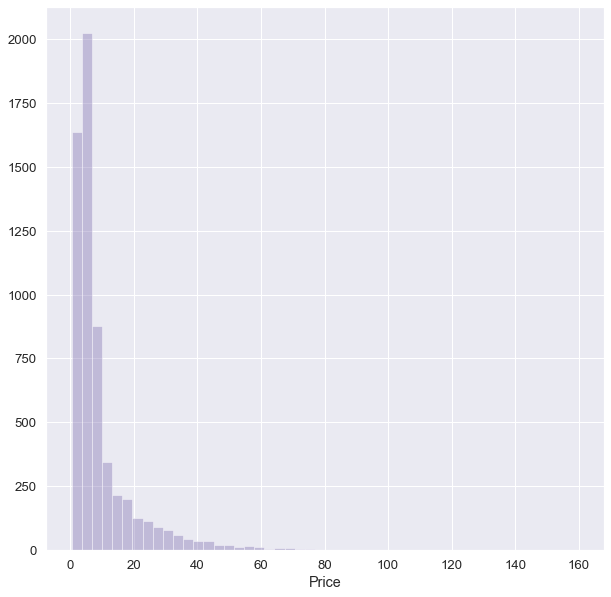

In [117]:
sns.distplot(df["Price"],kde=False,color="m")

<AxesSubplot:xlabel='Kilometers_Driven'>

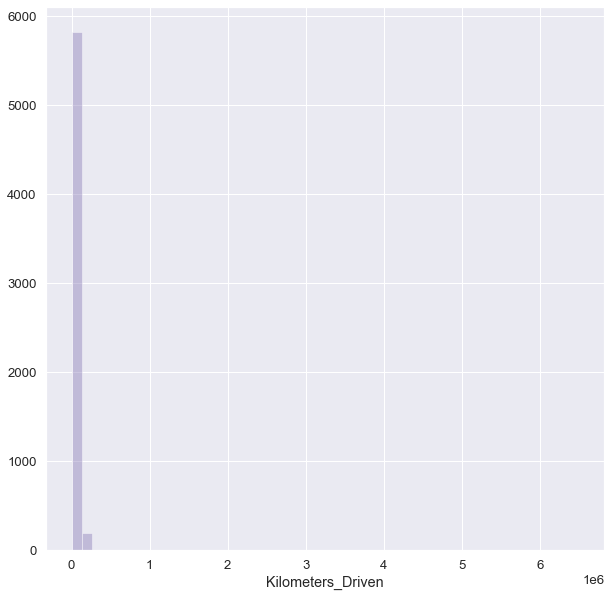

In [118]:
sns.distplot(df["Kilometers_Driven"],kde=False,color="m")

<AxesSubplot:xlabel='Year'>

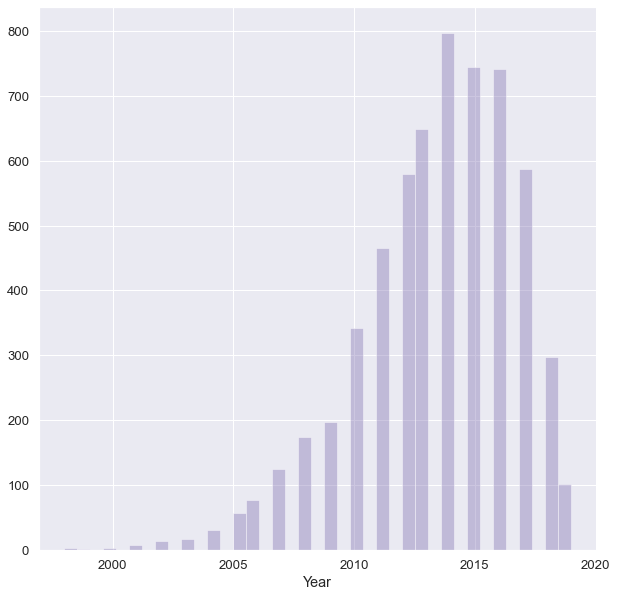

In [119]:
sns.distplot(df["Year"],kde=False,color="m")

<AxesSubplot:xlabel='Power (bhp)'>

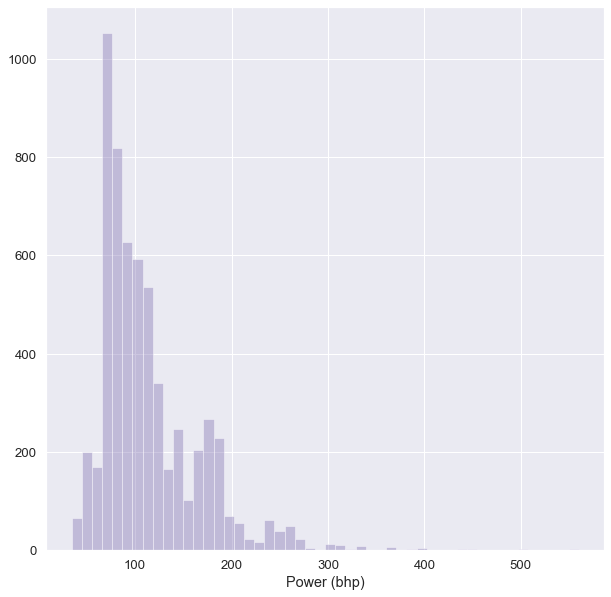

In [120]:
sns.distplot(df["Power (bhp)"],kde=False,color="m")

<AxesSubplot:xlabel='Seats'>

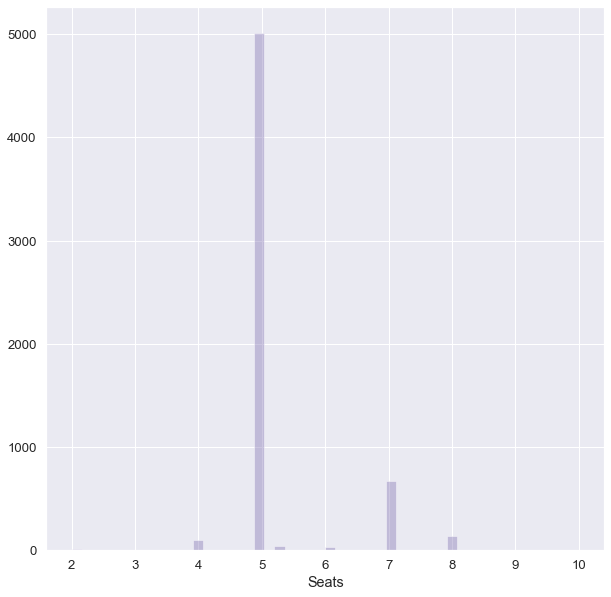

In [121]:
sns.distplot(df["Seats"],kde=False,color="m")

<AxesSubplot:xlabel='Engine (cc)'>

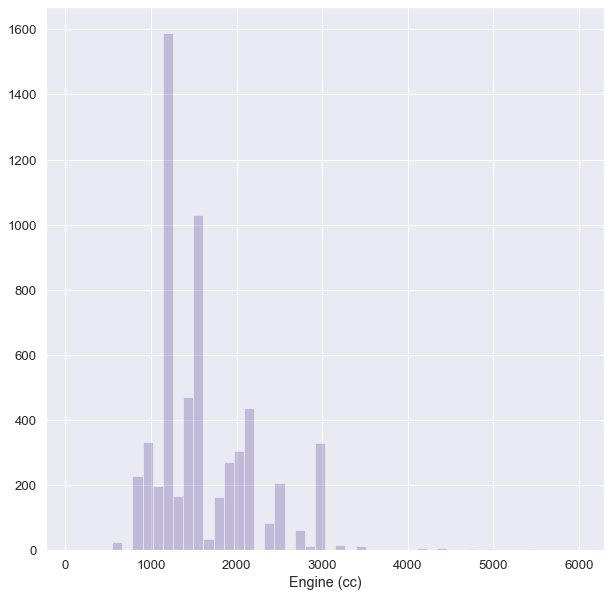

In [122]:
sns.distplot(df["Engine (cc)"],kde=False,color="m")
 

<AxesSubplot:xlabel='Mileage (km/kg)'>

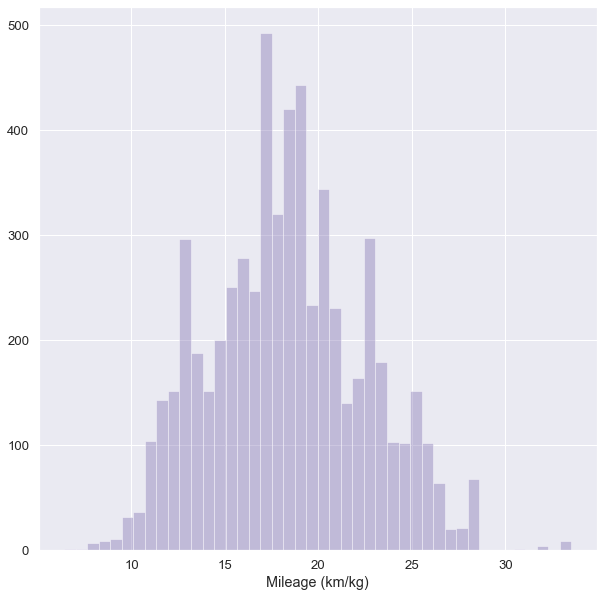

In [123]:
sns.distplot(df["Mileage (km/kg)"],kde=False,color="m")

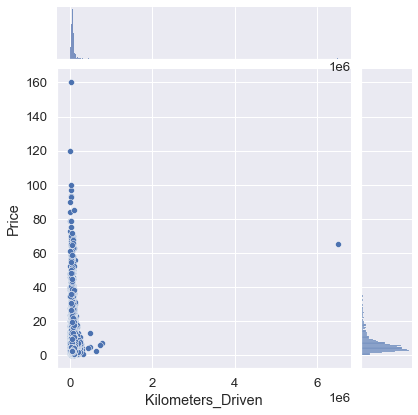

In [124]:
sns.jointplot(x=df["Kilometers_Driven"],y=df["Price"])

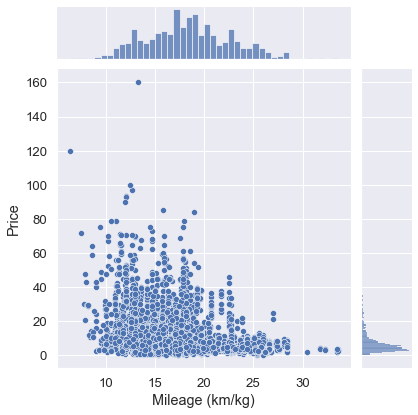

In [125]:
sns.jointplot(x=df["Mileage (km/kg)"],y=df["Price"],)

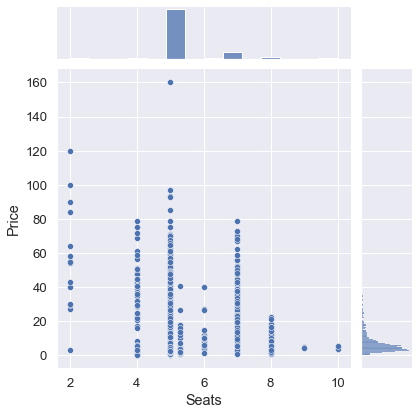

In [126]:
sns.jointplot(x=df["Seats"],y=df["Price"],)

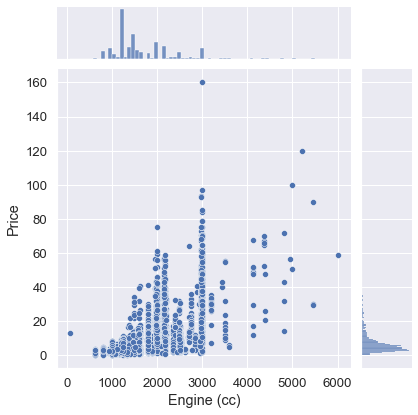

In [127]:
sns.jointplot(x=df["Engine (cc)"],y=df["Price"],)

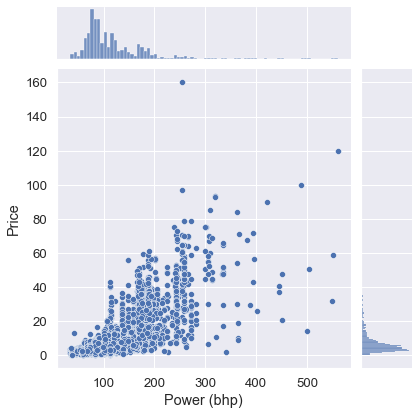

In [128]:
sns.jointplot(x=df["Power (bhp)"],y=df["Price"],)

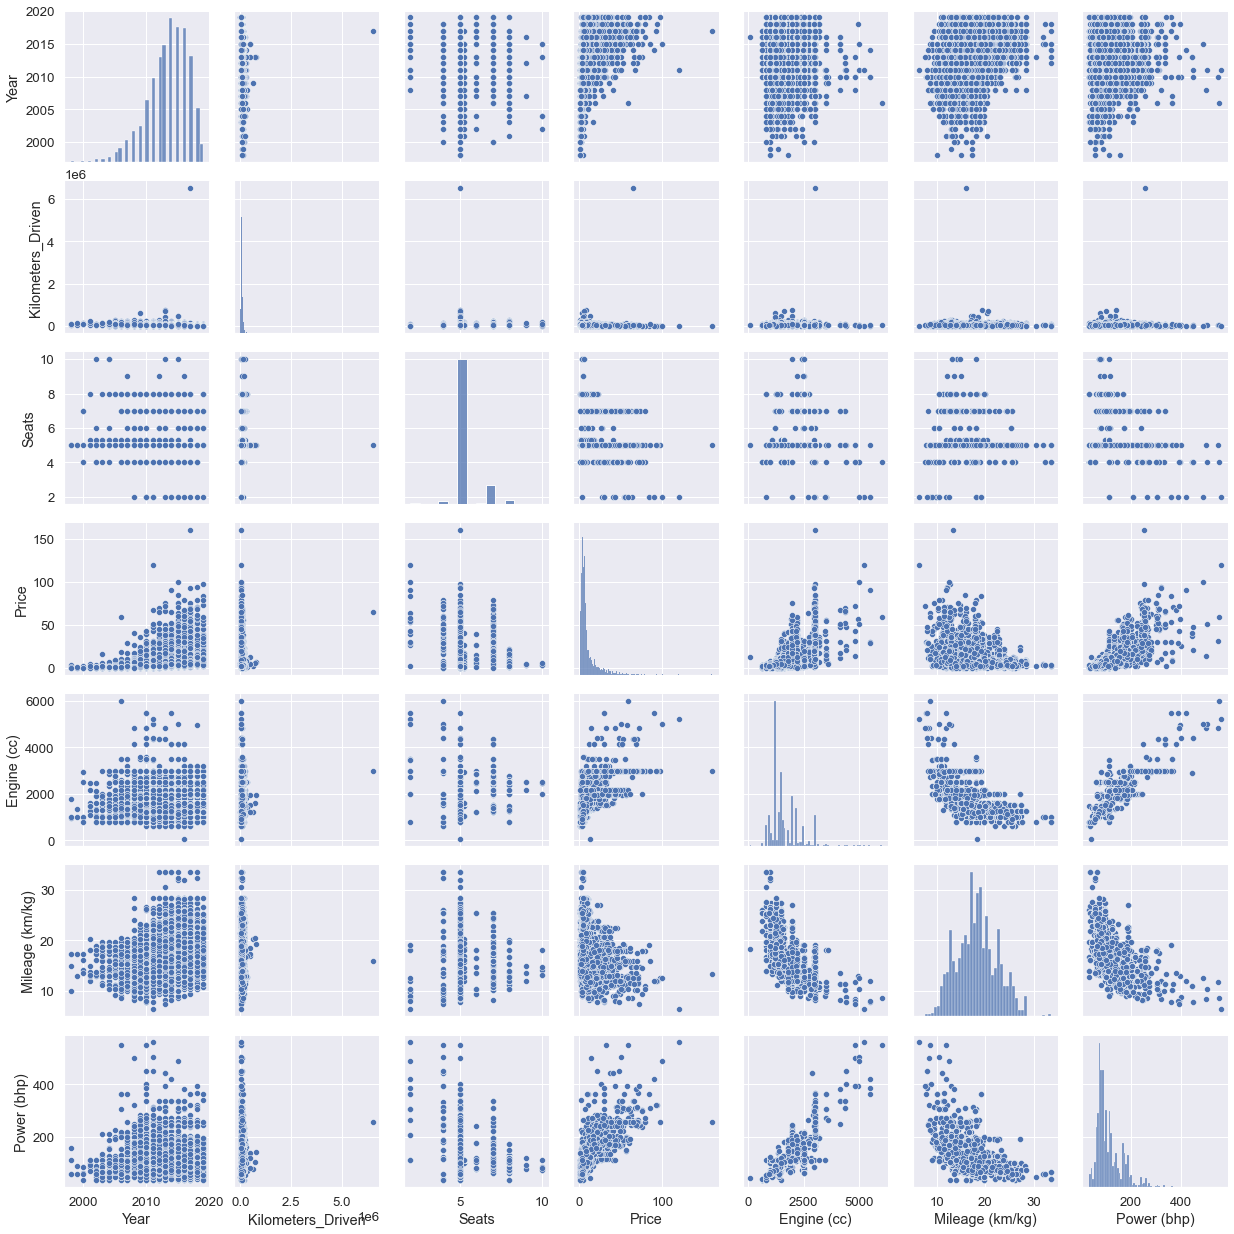

In [129]:
sns.pairplot(df)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Seats              6019 non-null   float64
 7   Price              6019 non-null   float64
 8   company            6019 non-null   object 
 9   Engine (cc)        6019 non-null   float64
 10  Mileage (km/kg)    6019 non-null   float64
 11  Power (bhp)        6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


### categorical features
- Location                      
- Fuel_Type
- Transmission       
- Owner_Type                
- company            
 

<AxesSubplot:xlabel='Location', ylabel='count'>

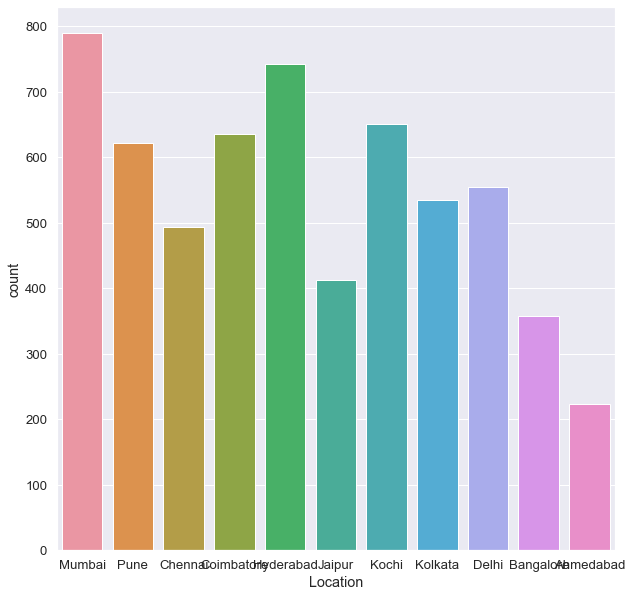

In [131]:
sns.countplot(x='Location', data=df)


<AxesSubplot:xlabel='Transmission', ylabel='count'>

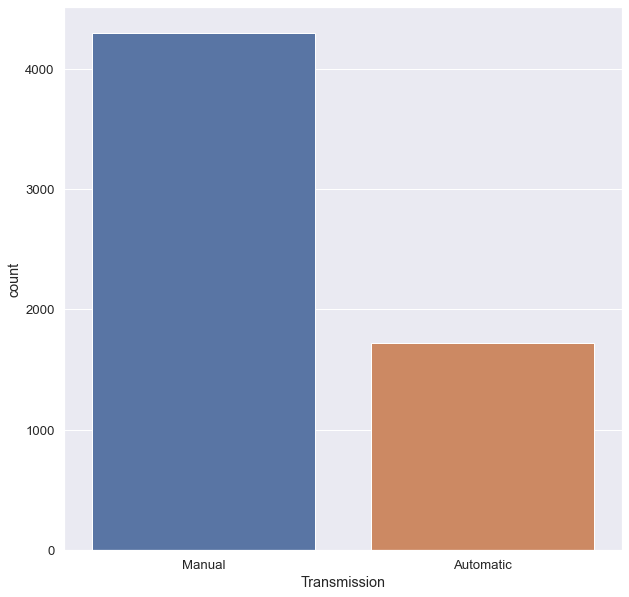

In [132]:
sns.countplot(x='Transmission', data=df)


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

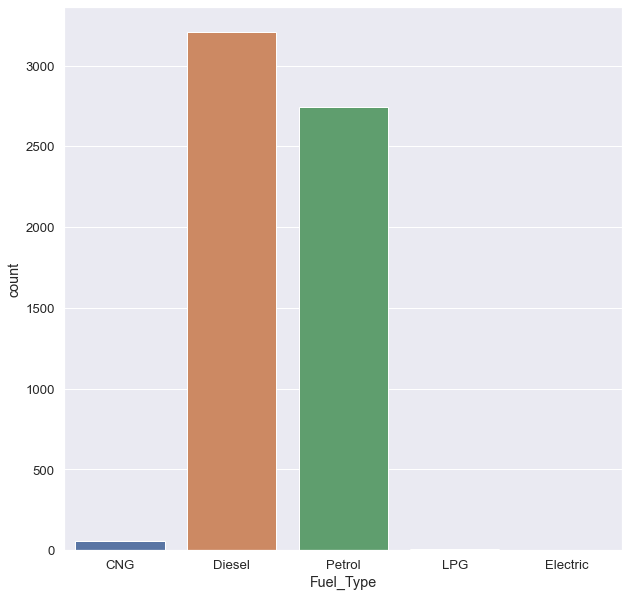

In [133]:
sns.countplot(x='Fuel_Type', data=df)


<AxesSubplot:xlabel='company', ylabel='count'>

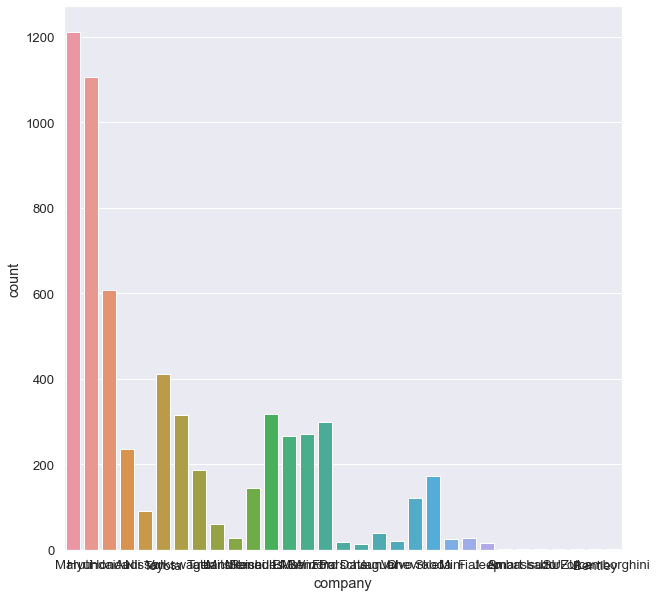

In [134]:
sns.countplot(x='company', data=df)


In [135]:
df["Location"].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

<AxesSubplot:xlabel='Seats', ylabel='Price'>

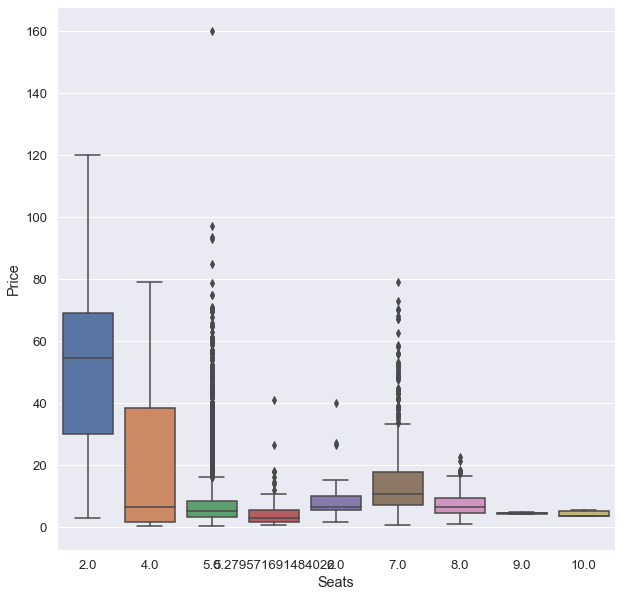

In [136]:
sns.boxplot(y='Price', x='Seats', data=df)


<AxesSubplot:xlabel='Transmission', ylabel='Price'>

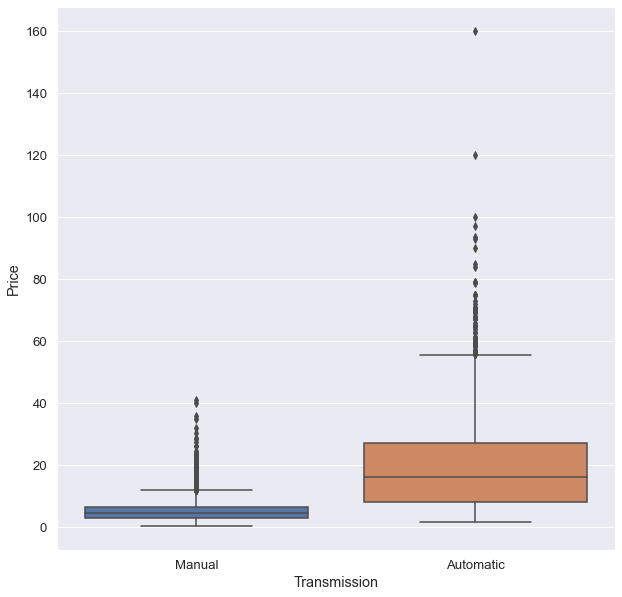

In [137]:
sns.boxplot(y='Price', x='Transmission', data=df)


<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

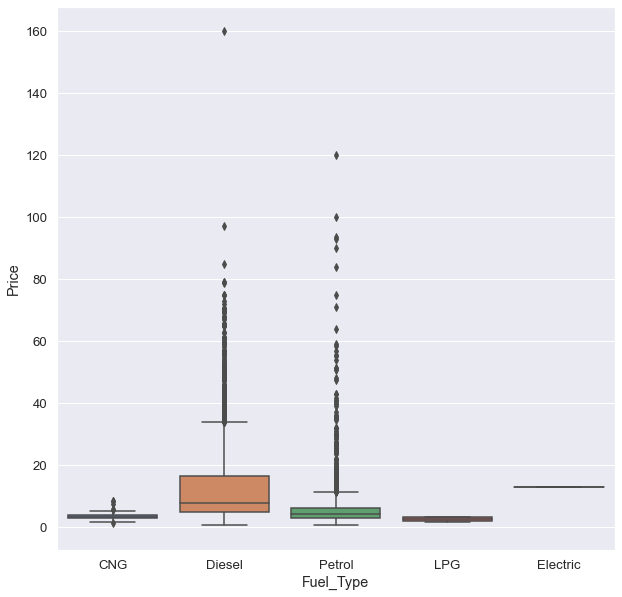

In [138]:
sns.boxplot(y='Price', x='Fuel_Type', data=df)


<AxesSubplot:xlabel='Price', ylabel='company'>

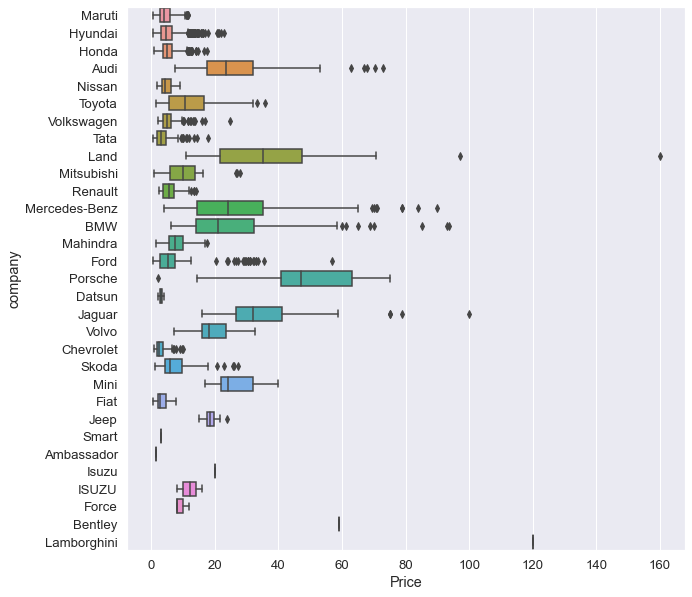

In [139]:
sns.boxplot(x='Price', y='company', data=df)


<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

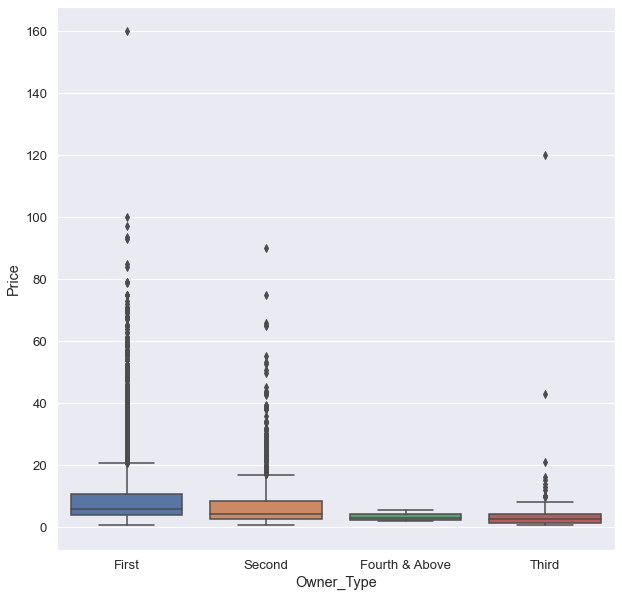

In [140]:
sns.boxplot(y='Price', x='Owner_Type', data=df)


<AxesSubplot:>

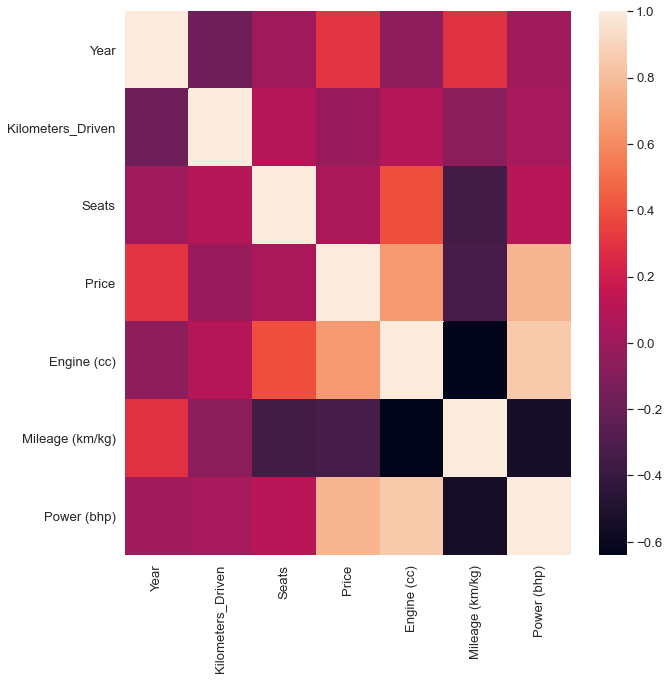

In [141]:
sns.heatmap(df.corr())

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Seats              6019 non-null   float64
 7   Price              6019 non-null   float64
 8   company            6019 non-null   object 
 9   Engine (cc)        6019 non-null   float64
 10  Mileage (km/kg)    6019 non-null   float64
 11  Power (bhp)        6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [143]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'company', 'Engine (cc)',
       'Mileage (km/kg)', 'Power (bhp)'],
      dtype='object')

In [144]:
#df["Owner_Type"]=df["Owner_Type"].replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4})


In [145]:
df = pd.get_dummies(df, columns=['Location',"Fuel_Type","Transmission","company","Owner_Type"], drop_first=True)

df

,Year,Kilometers_Driven,Seats,Price,Engine (cc),Mileage (km/kg),Power (bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,company_Renault,company_Skoda,company_Smart,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,5.0,1.75,998.0,26.60,58.16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,1582.0,19.67,126.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,1199.0,18.20,88.70,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,1248.0,20.77,88.76,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,1968.0,15.20,140.80,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,5.0,4.75,1248.0,28.40,74.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,5.0,4.00,1120.0,24.40,71.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,8.0,2.90,2498.0,14.00,112.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6017,2013,46000,5.0,2.65,998.0,18.90,67.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
df

,Year,Kilometers_Driven,Seats,Price,Engine (cc),Mileage (km/kg),Power (bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,company_Renault,company_Skoda,company_Smart,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,5.0,1.75,998.0,26.60,58.16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,1582.0,19.67,126.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,1199.0,18.20,88.70,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,1248.0,20.77,88.76,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,1968.0,15.20,140.80,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,5.0,4.75,1248.0,28.40,74.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,5.0,4.00,1120.0,24.40,71.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,8.0,2.90,2498.0,14.00,112.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6017,2013,46000,5.0,2.65,998.0,18.90,67.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
##train_test_split of data
x=df.drop(["Price"],axis=1)
y=df[["Price"]]

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=44, shuffle =True)


In [149]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# ML Algorithms

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [151]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [152]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*30)

Using model: LR
Training Score: 0.7855210856572843
Test Score: 0.7472267715940604
------------------------------
Using model: KNNR
Training Score: 0.8532122069571676
Test Score: 0.7472398207678685
------------------------------
Using model: SVR


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Score: 0.7121909388274179
Test Score: 0.7002907034255115
------------------------------
Using model: DT
Training Score: 0.9999990556976979
Test Score: 0.7473307003686728
------------------------------
Using model: RF


<ipython-input-152-5417eb4b4bc0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Training Score: 0.9860672216736677
Test Score: 0.8698251593418098
------------------------------
Using model: XGBR
Training Score: 0.9950124506279797
Test Score: 0.8797063649081978
------------------------------


In [153]:
model =RandomForestRegressor()

model.fit(x_train, y_train)

<ipython-input-153-190458627af1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor()

In [154]:
y_pred = model.predict(x_test)
y_pred

array([45.6472,  3.6643,  3.4428, ..., 10.0509, 18.4745,  5.9489])

In [155]:
y_test

,Price
5775,45.00
2620,2.50
3753,4.61
4841,13.95
1408,12.50
...,...
3509,9.18
4177,6.55
5011,12.08
3261,14.50


In [156]:
x.columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Engine (cc)', 'Mileage (km/kg)',
       'Power (bhp)', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'company_Audi', 'company_BMW', 'company_Bentley',
       'company_Chevrolet', 'company_Datsun', 'company_Fiat', 'company_Force',
       'company_Ford', 'company_Honda', 'company_Hyundai', 'company_ISUZU',
       'company_Isuzu', 'company_Jaguar', 'company_Jeep',
       'company_Lamborghini', 'company_Land', 'company_Mahindra',
       'company_Maruti', 'company_Mercedes-Benz', 'company_Mini',
       'company_Mitsubishi', 'company_Nissan', 'company_Porsche',
       'company_Renault', 'company_Skoda', 'company_Smart', 'company_Tata',
       'company_Toyota', 'c

In [157]:
custom_data = ([2012, 2000,5,55,30, 60,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [158]:
xx=([2022,72000,5,998,26,58,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [159]:
len(xx)

54

In [160]:
xx = scaler.transform([xx])

In [161]:
predictio = model.predict(xx)[0]
predictio

3.788600000000001

In [162]:
len(custom_data)

54

In [163]:
custom_data = scaler.transform([custom_data])

In [164]:
prediction = model.predict(custom_data)[0]
prediction

2.3537000000000017

In [72]:
import joblib

In [73]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler,"scaler.h5")

['scaler.h5']

In [74]:

ll = ([2012, 2000,5,55,30, 60,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [75]:
g=joblib.load("model.h5")
o=joblib.load("scaler.h5")


In [76]:
ll = o.transform([ll])

In [77]:
p = g.predict(ll)[0]
p

231880.0